In [1]:
import sys
from pathlib import Path

def get_project_root():
    for path in (Path.cwd(), *Path.cwd().parents):
        if (path / 'src').exists():
            return path
    raise ModuleNotFoundError("Could not find 'src' directory from current working directory.")

project_root = get_project_root()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.plot_data_utils import PlotDataUtils
# Initialise utilities for the input CSV data
data_utils = PlotDataUtils(Path('../data/input_data.csv'))

# Then load the data
df = data_utils.load_data()

base_primitive._run:WARNING:2025-12-14 08:31:09,141: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


Best bitstring: 101100000010100110000001
Coarse discharge schedule (MWh): [4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0]


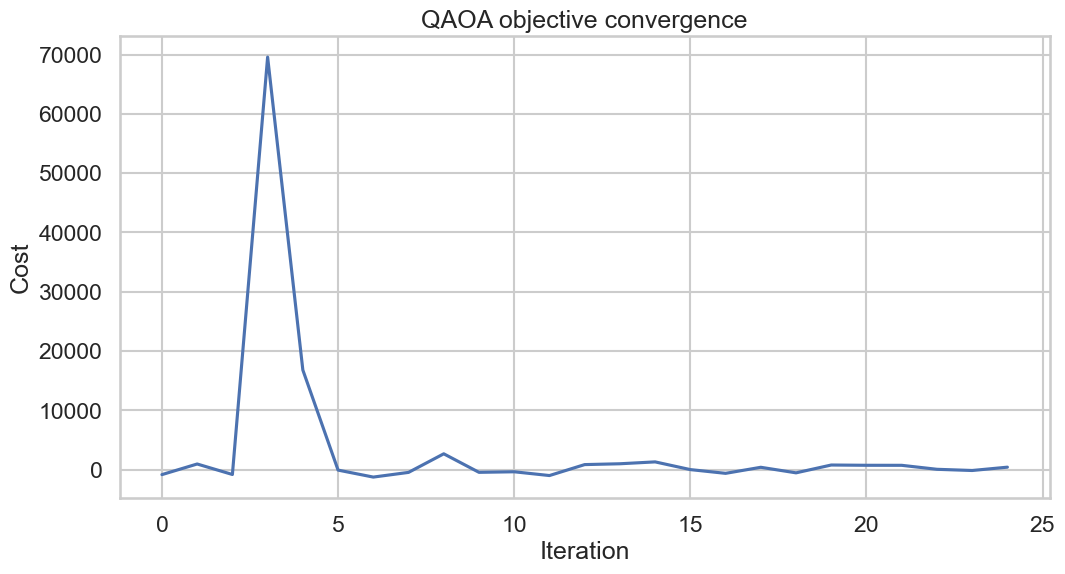

In [3]:
from qiskit_aer import AerSimulator
from src.qaoa_guess_solver import QAOAGuessSolver

# Example: loading a QUBO matrix from CSV (matches your original tutorial)
csv_path = "../data/qubo_matrix_symmetric.csv"

# Instantiate the solver; reps=1 corresponds to a single layer QAOA ansatz
solver = QAOAGuessSolver(reps=1)

# Solve the QUBO using the fake Sherbrooke device for the Estimator/Sampler
result = solver.solve(qubo_matrix_path=csv_path, backend=AerSimulator())

# Extract results
bitstring = result["bitstring"]
distribution = result["distribution"]
discharge_guess = result["discharge_guess"]
objective_values = result["objective_values"]

print("Best bitstring:", bitstring)
print("Coarse discharge schedule (MWh):", discharge_guess)

# Optionally plot the optimisation progress
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(objective_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("QAOA objective convergence")
plt.show()
